### Loan Repayment Prediction using Machine Learning for Financial Risk Management

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
main_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
main_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
main_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#filling all missing fields with values above
main_dataset.fillna(method='ffill', inplace=True)

C:\Users\singh\AppData\Local\Temp\ipykernel_18124\1690027900.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_dataset.fillna(method='ffill', inplace=True)


In [6]:
#comverting categorical values to numerical values
label_encoder = LabelEncoder()
main_dataset['Loan_Status'] = label_encoder.fit_transform(main_dataset['Loan_Status'])

In [7]:
#convering all non-numeric columns to numeric columns using Label Endoding
main_dataset['Gender'] = label_encoder.fit_transform(main_dataset['Gender'])
main_dataset['Married'] = label_encoder.fit_transform(main_dataset['Married'])
main_dataset['Education'] = label_encoder.fit_transform(main_dataset['Education'])
main_dataset['Self_Employed'] = label_encoder.fit_transform(main_dataset['Self_Employed'])
main_dataset['Property_Area'] = label_encoder.fit_transform(main_dataset['Property_Area'])
main_dataset['Dependents'] = label_encoder.fit_transform(main_dataset['Dependents'])

In [8]:
main_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [9]:
#adding Loan_ID column to a different variable
loanid_addlater = main_dataset['Loan_ID']
loanid_addlater.head()

0    LP001002
1    LP001003
2    LP001005
3    LP001006
4    LP001008
Name: Loan_ID, dtype: object

In [10]:
#dropping Loan_ID column
main_dataset.drop('Loan_ID', axis=1, inplace=True)

In [11]:
#checking if there are any NaN values
main_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#removing any NaN values from the dataset
main_dataset = main_dataset.fillna(main_dataset.mean())

In [13]:
#seperating all independent and dependent features/columns in seperate variables X and Y

#so we drop the dependent feature (label) from the main df, so that it can be put in different a 
#variable and dependent in different variable

x = main_dataset.drop('Loan_Status',axis=1)       #independent columns
y = main_dataset['Loan_Status']   

In [14]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,147.381729,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [15]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [16]:
# Split the dataset into training (80%) and testing (20%) sets
#tota records = 641, training = 491, testing = 123
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Trying Logistics Regression

In [17]:
#initializing and trianing the logistics regression model 
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

#prediction on testing data
#applying the learned patterns on the testing dataset
pred_logiR = logreg.predict(x_test)

#checking accuracy of the model using logistics regression
accuracy_logiR = accuracy_score(y_test, pred_logiR)
print(f'Accuracy using Logistics Regression: {accuracy_logiR:.2f}')

#printing classification report
clsf_report_LogiR = classification_report(y_test, pred_logiR)
print(clsf_report_LogiR)

Accuracy using Logistics Regression: 0.81
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


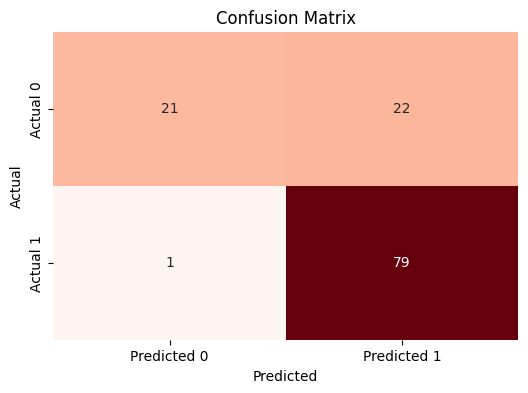

In [18]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_logiR)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

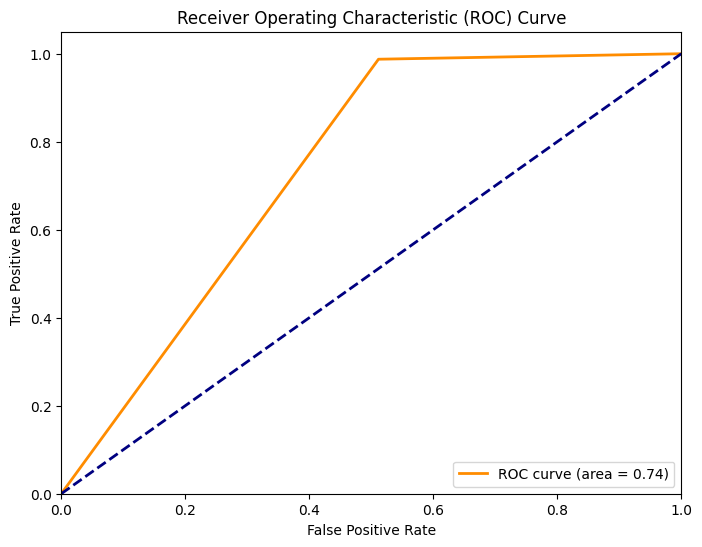

In [19]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_logiR)
auc = roc_auc_score(y_test, pred_logiR)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Trying SVM

In [20]:
from sklearn import svm
from sklearn.svm import SVC
svm_classifier = svm.SVC(kernel='linear') #using linear line to classify the points in SVM graph plotting
svm_classifier.fit(x_train, y_train) 

pred_svm = svm_classifier.predict(x_test)

accuracy_svm = accuracy_score(y_test, pred_svm)
print(f'Accuracy using SVM: {accuracy_svm:.2f}')

print(classification_report(y_test, pred_svm))

Accuracy using SVM: 0.80
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



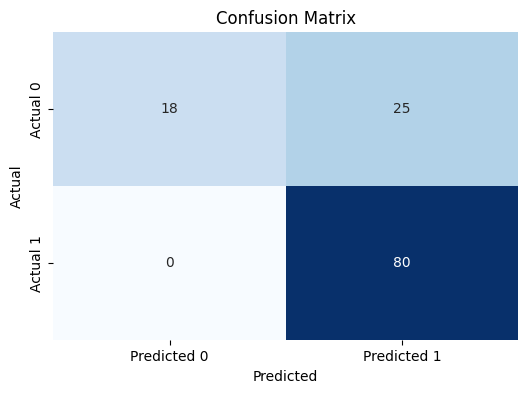

In [21]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

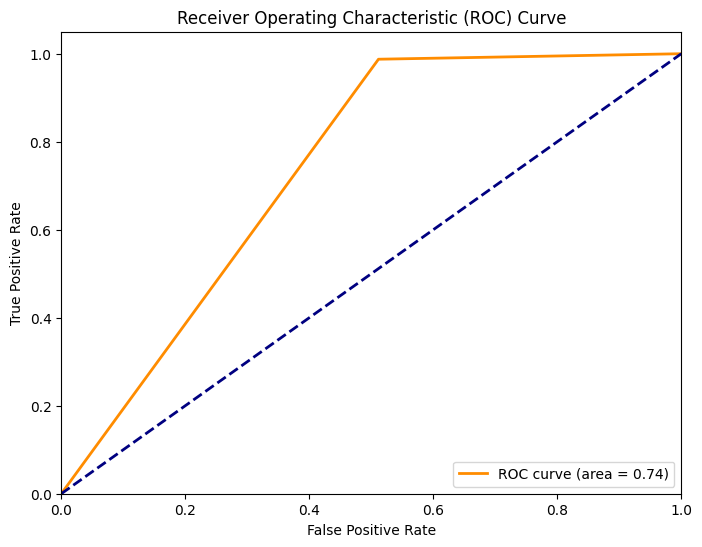

In [22]:
# printing the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Trying Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

pred_linR_continous = linear_regression.predict(x_test)
pred_linR_binary = np.where(pred_linR_continous >=0.5, 1, 0)

accuracy_linR = accuracy_score(y_test, pred_linR_binary)
print(f'Accuracy using Linear Regression: {accuracy_linR:.2f}')

print(classification_report(y_test, pred_linR_binary))

Accuracy using Linear Regression: 0.81
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



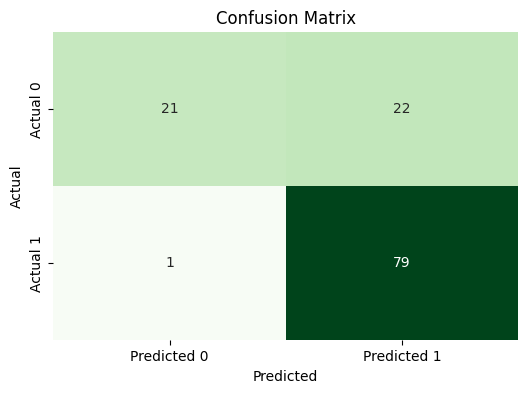

In [24]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_linR_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

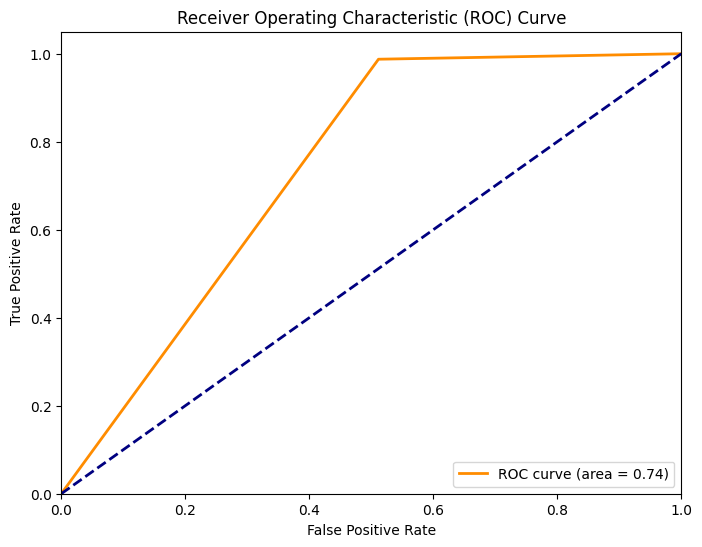

In [25]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_linR_binary)
auc = roc_auc_score(y_test, pred_linR_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Trying Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators defines the number of decision trees
rf_classifier.fit(x_train, y_train)

pred_rf = rf_classifier.predict(x_test)

accuracy_rf = accuracy_score(y_test, pred_rf)

print(f'Accuracy using Random Forest: {accuracy_rf:.2f}')

print(classification_report(y_test, pred_rf))

Accuracy using Random Forest: 0.78
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



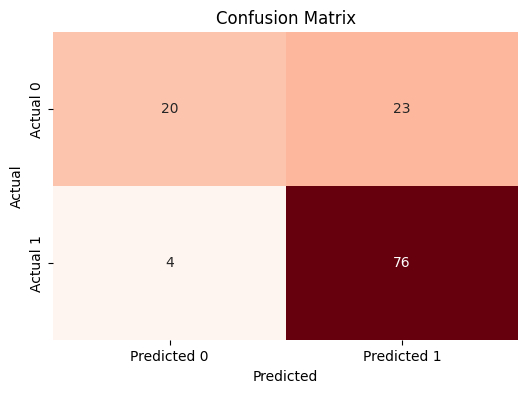

In [27]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

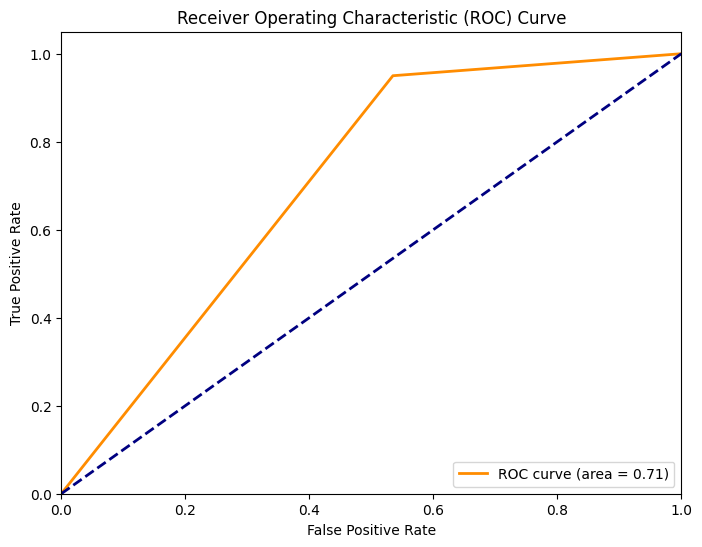

In [28]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
auc = roc_auc_score(y_test, pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Using XGBoost

In [29]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

pred_xgb = xgb_classifier.predict(x_test)

accuracy_xgb = accuracy_score(y_test, pred_xgb)
print(f'Accuracy using XGB: {accuracy_xgb:.2f}')

print(classification_report(y_test, pred_xgb))

Accuracy using XGB: 0.76
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123



c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


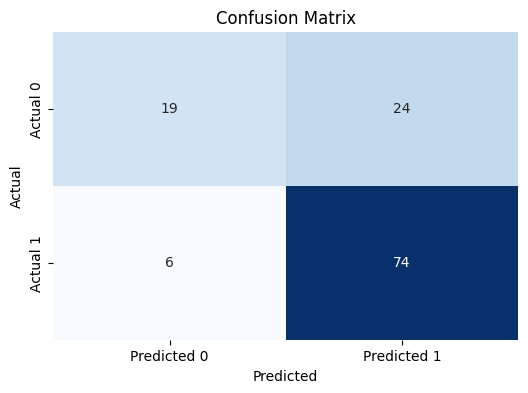

In [30]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

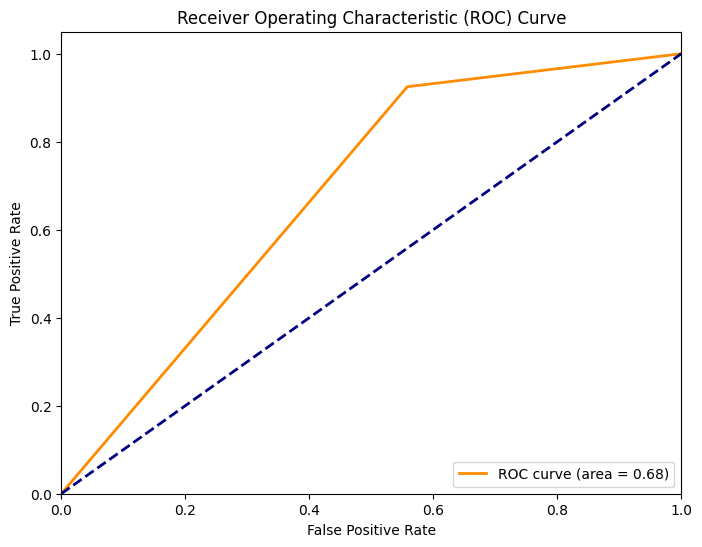

In [31]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)
auc = roc_auc_score(y_test, pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Using Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

pred_nb = nb_classifier.predict(x_test)

accuracy_nb = accuracy_score(y_test, pred_nb)
print(f'Accuracy using Naive Bayes: {accuracy_nb:.2f}')

print(classification_report(y_test, pred_nb))

Accuracy using Naive Bayes: 0.81
              precision    recall  f1-score   support

           0       0.92      0.51      0.66        43
           1       0.79      0.97      0.87        80

    accuracy                           0.81       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.81      0.80       123



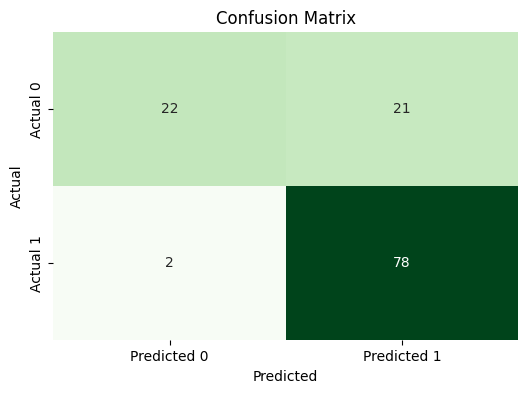

In [33]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

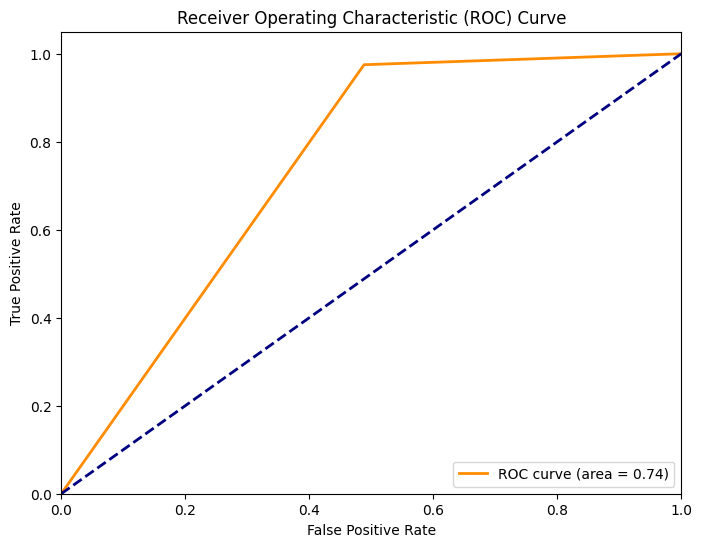

In [34]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_nb)
auc = roc_auc_score(y_test, pred_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Using KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

pred_knn= model.predict(x_test)

accuracy_knn = accuracy_score(y_test, pred_knn)
print(f'Accuracy using KNN: {accuracy_knn}')

print(classification_report(y_test, pred_knn))

Accuracy using KNN: 0.5609756097560976
              precision    recall  f1-score   support

           0       0.39      0.47      0.43        43
           1       0.68      0.61      0.64        80

    accuracy                           0.56       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.58      0.56      0.57       123



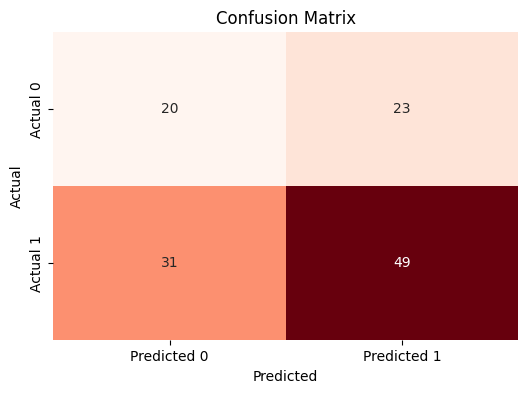

In [36]:
#printing confusion matrix
cm_logiR = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logiR, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

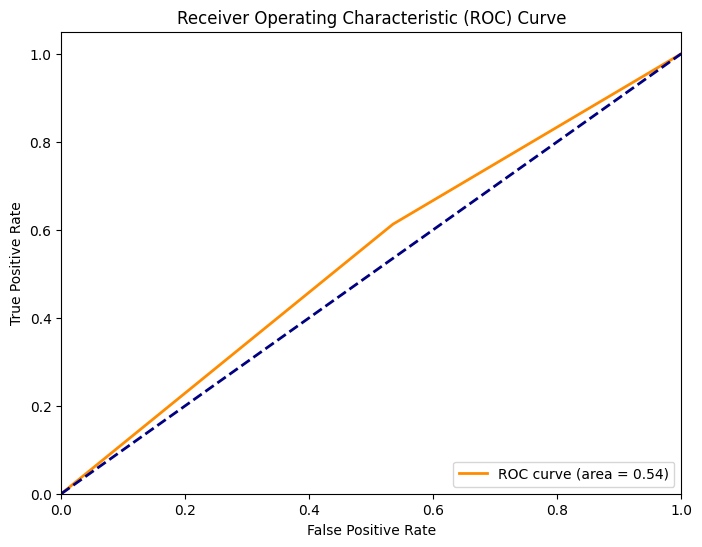

In [37]:
# printing the ROC curve
from sklearn.metrics import roc_auc_score
y_scores = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_knn)
auc = roc_auc_score(y_test, pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Checking for highest accuracy

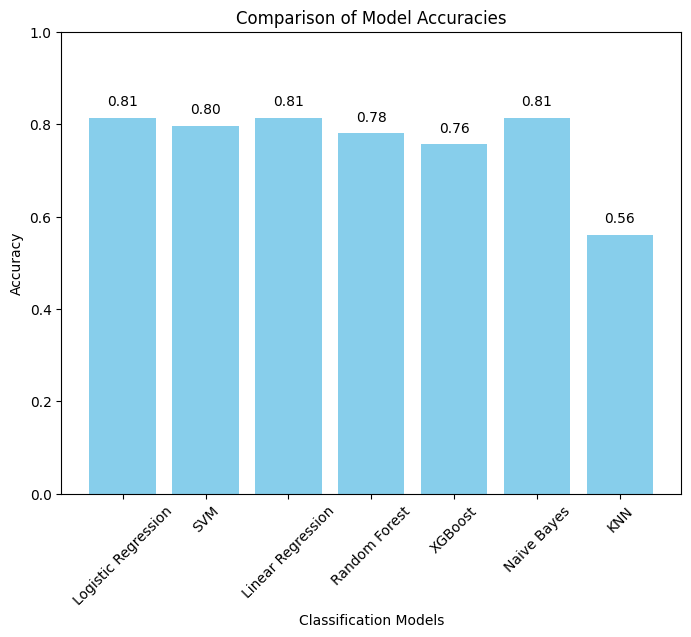

In [38]:
model_names = ['Logistic Regression', 'SVM', 'Linear Regression', 'Random Forest', 'XGBoost', 'Naive Bayes', 'KNN']
accuracies = [
    accuracy_logiR,
    accuracy_svm,
    accuracy_linR,
    accuracy_rf,
    accuracy_xgb,
    accuracy_nb,
    accuracy_knn
]
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  
plt.xticks(rotation=45)  #rotating model names if they overlap

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.02,  # Position the text slightly above the bar
        f'{yval:.2f}',  # Format the value to 2 decimal places
        ha='center',  # Center-align the text horizontally
        va='bottom'   # Bottom-align the text vertically
    )
plt.show()

In [39]:
x_train.to_csv('X_train.csv', index=False)
x_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)